# Spark DeepVariant Architecture Example

## List available datasets and download reference dataset

In [4]:
from orange.genomics.datasets import Downloader

downloader = Downloader()\
    .setCacheFolder("./datastore")\
    .useMirrors(True)\
    .checkHash(True)

downloader.search("GRCh38*")

GRCh38_no_alt_analysis
GRCh38_alt_analysis
...


In [3]:
# download a reference genome
reference_df = downloader.download("GRCh38_no_alt_analysis")
# download input data
input_df = downloader.download("HG003.novaseq.pcr-free.35x.dedup.grch38_no_alt.chr20.bam")

downloading...


## Visualize input data

In [ ]:
display(reference_df)

## Create Pipeline

In [ ]:
from orange.genomics.variant import ExamplesGenerator, VariantCaller, PostProcessor

generator = ExamplesGenerator()\
    .setInputColumns("input")\
    .setReferenceGenome(reference_df)\
    .setOutputColumn("examples")

caller = VariantCaller()\
    .setInputColumns("examples")
    .setOutputColumns("variants")
    
pprocessor = PostProcessor()\
    .setQualFilter(1.2)\
    .groupVariantes(True)\
    .setOutputColumn("filtered_variants")

pipeline = Pipeline()\
    .setStages([generator, caller, pprocessor])

pipeline = pipeline.fit(input_df)

## Run predictions

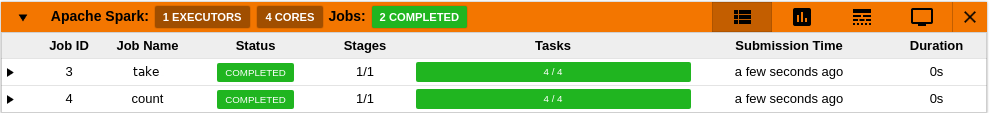

In [12]:
results = pipeline.transform(input_df)
samples = results.take(4)

In [5]:
samples

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	HG003
chr20	60001	.	T	<*>	0	.	END=60003	GT:GQ:MIN_DP:PL	0/0:9:3:0,9,89
chr20	60004	.	T	<*>	0	.	END=60009	GT:GQ:MIN_DP:PL	0/0:12:4:0,12,119
chr20	60010	.	G	<*>	0	.	END=60016	GT:GQ:MIN_DP:PL	0/0:18:6:0,18,179
chr20	60017	.	G	<*>	0	.	END=60027	GT:GQ:MIN_DP:PL	0/0:21:7:0,21,209


In [7]:
results.printSchema()


+ input
+ examples
+ variants
+ filtered_variants
+ etc



## Inspect some of the generated examples

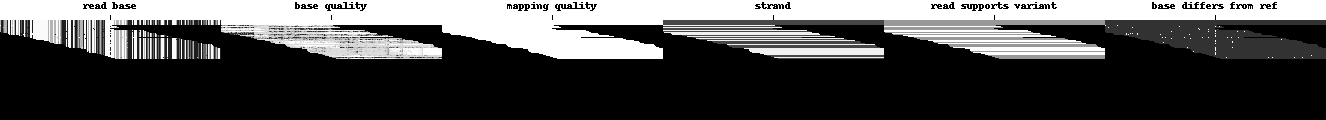

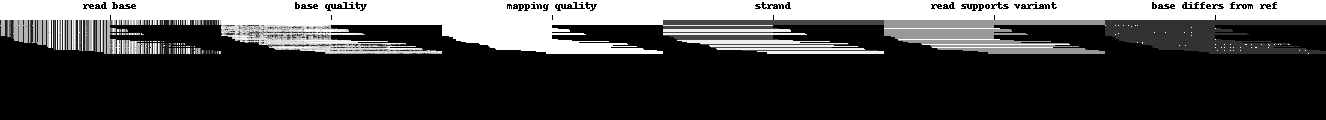

In [11]:
# check https://google.github.io/deepvariant/posts/2020-02-20-looking-through-deepvariants-eyes/
from orange.genomics.visualization import display_examples

display_examples(results.select("examples").limit(2))

## Write results to standard VCF format

In [ ]:
results.write.vcf("./patient_xyz.vcf")\
    .addMetadata(True)
    .addHeaders(True)